### Рубежный контроль №1
### Киселев Артем, ИУ5-62Б,
### Вариант 11, Задание 2.

### Задание №2.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

# Технологии разведочного анализа и обработки данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('marvel-wikia-data.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(16376, 13)

In [4]:
# типы колонок
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [7]:
# Основные статистические характеристки набора данных
data.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


#### Построим гистограмму для столбца Year

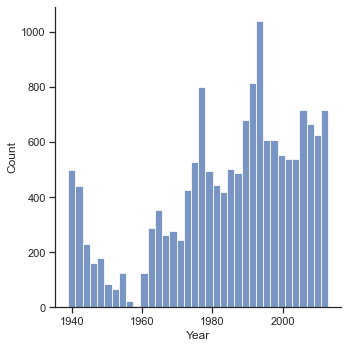

In [8]:
sns.displot(x=data['Year'])

### Обработка пропусков в числовых данных

In [11]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 16376


In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 6.69%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,APPEARANCES,Year
0,4043.0,1962.0
1,3360.0,1941.0
2,3061.0,1974.0
3,2961.0,1963.0
4,2258.0,1950.0
...,...,...
16371,NaN,NaN
16372,NaN,NaN
16373,NaN,NaN
16374,NaN,NaN


In [14]:
data_num_APPEARANCES = data_num[['APPEARANCES']]
data_num_APPEARANCES.head()

,APPEARANCES
0,4043.0
1,3360.0
2,3061.0
3,2961.0
4,2258.0


In [15]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_APPEARANCES)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

Попробуем заполнить пропущенные значения в колонке APPEARANCES значениями, вычисленными по среднему арифметическому, медиане и моде.

In [16]:
strategies=['mean', 'median', 'most_frequent']

In [17]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [18]:
data[['APPEARANCES']].describe()

,APPEARANCES
count,15280.000000
mean,17.033377
std,96.372959
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,4043.000000


In [19]:
test_num_impute_col(data, 'APPEARANCES', strategies[0])

('APPEARANCES', 'mean', 1096, 17.033376963350786, 17.033376963350786)

In [20]:
test_num_impute_col(data, 'APPEARANCES', strategies[1])

('APPEARANCES', 'median', 1096, 3.0, 3.0)

In [21]:
test_num_impute_col(data, 'APPEARANCES', strategies[2])

('APPEARANCES', 'most_frequent', 1096, 1.0, 1.0)

In [22]:
data1=data
data1['APPEARANCES'] = data['APPEARANCES'].fillna(round(data[['APPEARANCES']].median()[0], 3))

In [23]:
data1.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES             0
FIRST APPEARANCE      815
Year                  815
dtype: int64

### Обработка пропусков в категориальных данных

In [24]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 23.02%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 17.17%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 59.64%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 26.04%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 99.45%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.


In [25]:
cat_temp_data = data[['ALIGN']]
cat_temp_data.head()

,ALIGN
0,Good Characters
1,Good Characters
2,Neutral Characters
3,Good Characters
4,Good Characters


In [26]:
cat_temp_data['ALIGN'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters', nan],
      dtype=object)

In [27]:
cat_temp_data[cat_temp_data['ALIGN'].isnull()].shape

(2812, 1)

In [28]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Good Characters'],
       ['Good Characters'],
       ['Neutral Characters'],
       ...,
       ['Bad Characters'],
       ['Neutral Characters'],
       ['Bad Characters']], dtype=object)

In [29]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Bad Characters', 'Good Characters', 'Neutral Characters'],
      dtype=object)

In [30]:
cat_temp_data1 = data[['FIRST APPEARANCE']]
cat_temp_data1.head()

,FIRST APPEARANCE
0,Aug-62
1,Mar-41
2,Oct-74
3,Mar-63
4,Nov-50


In [31]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
data_imp3 = imp3.fit_transform(cat_temp_data1)
data_imp3

array([['Aug-62'],
       ['Mar-41'],
       ['Oct-74'],
       ...,
       ['Unknown'],
       ['Unknown'],
       ['Unknown']], dtype=object)

In [32]:
data_imp3[data_imp3=='Unknown'].size

815

### Выводы

In [33]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 23.02%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 17.17%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 59.64%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 26.04%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 99.45%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.


Исходя из количества пропусков в определенный колонках можно сделать следующие выводы:
- Колонки, содержащие менее 30% пропусков выбираем для построения модели.
- Колонки EYE (59.64%), GSM (99.45%) не выбираем для построения модели

В данной работе для обрабоки пропусков данных мы использовали импутацию данных в количественном признаке APPEARANCES, использовав медиану (мода и среднее значение также были проверены как возможные). 


Для категориальных признаков ALIGN и FIRST APPEARANCE были применены импутации данных, а именно: для признакака ALIGN была произведена импьютация наиболее частыми значениями (most_frequent), а для признака FIRST APPEARANCE - импьютация константой "Unknown".